
# Avocado Prices

The aim of this notebook is to demonstrate the use of exploratory data analysis combined with hacker statistics and hypothesis testing to answer some questions about data on avocado sales in the United States.

### Historical data on avocado prices and sales volume in multiple US markets

https://www.kaggle.com/neuromusic/avocado-prices


Description of the data from the Hass Avocado Board:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

###### Questions:

1. Is there a significant difference in average price between conventional and organic avocados?
3. What are the cheapest and most expensive regions?
4. How does the price vary with time (years, months, seasons)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data into a pandas DataFrame
avocados = pd.read_csv("avocado.csv", header=0, index_col=0)

In [3]:
# Check to see if there are any missing values in each column
avocados.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [4]:
# Print info about columns
avocados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


+ There are a total of 18249 observations and 12 variables

In [5]:
# Rename product number columns
avocados = avocados.rename({"4046": "Small / Medium",
                            "4225": "Large",
                            "4770": "Extra Large"}, axis="columns")

In [6]:
# Convert "Date" column to datetime type to make use of dt methods
avocados["Date"] = pd.to_datetime(avocados["Date"])

In [7]:
# View the first few rows of the dataset, sorted by date
avocados.sort_values("Date").head()

,Date,AveragePrice,Total Volume,Small / Medium,Large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


### Exploratory Data Analysis

In [8]:
# View the correlation matrix
corr = avocados.corr()
corr.style.background_gradient(cmap='coolwarm')

,AveragePrice,Total Volume,Small / Medium,Large,Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
Small / Medium,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
Large,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
Extra Large,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Notes:
+ Small / medium avocados and small bags appear to be most popular (due to their correlation with total volume)
+ There is very little correlation between average price and year
+ Large correlation between volumes of avocados and number of bags sold - for obvious reasons

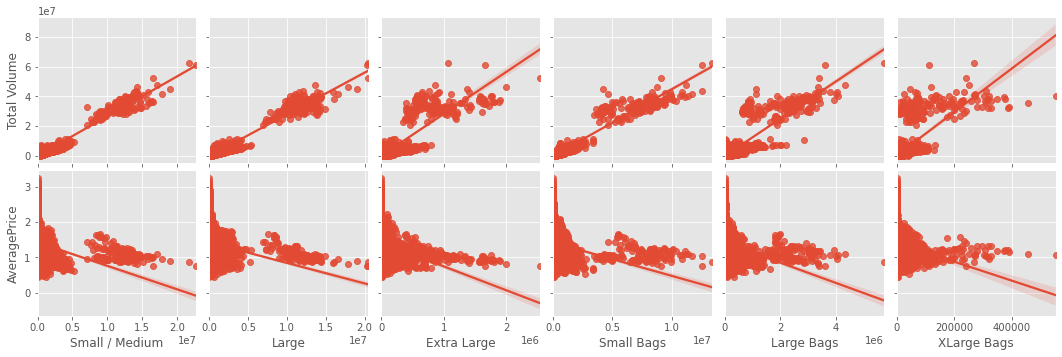

In [9]:
# Scatter plots of sizes of bags and sizes of avocados (x-axis) against average price
# and total volume (y-axis) with linear regression model fit
plt.style.use('ggplot')
sns.pairplot(avocados, x_vars=["Small / Medium", "Large", "Extra Large", "Small Bags", "Large Bags", "XLarge Bags"],
             y_vars=["Total Volume", "AveragePrice"], kind='reg')
plt.show()

+ The plots above show that there is little correlation between the number of bags sold and average price, and between the number avocados sold and average price.
+ However, there is correlation between the number of bags sold and total volume, and between the number avocados sold and total volume. We can also see that the amount of correlation varies depending on the size of the avocados and the size of the bags, though it is hard to say which have the strongest correlation.

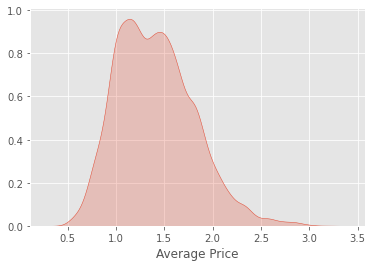

In [10]:
# Plot a kernel density estimate plot of "AveragePrice" to visualise its distribution
sns.kdeplot(avocados["AveragePrice"], fill=True)
plt.xlabel("Average Price")
plt.ylabel("")
plt.show()

In [45]:
# Calculate 2.5 and 97.5 percentiles
percentiles = np.percentile(avocados["AveragePrice"], [2.5, 97.5])
print(f"95% of the 'AveragePrice' values fall between ${percentiles[0]:.3} and ${percentiles[1]:.3}")

95% of the 'AveragePrice' values fall between $0.75 and $2.3


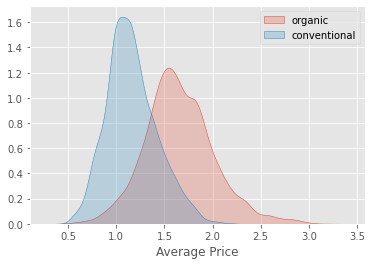

In [12]:
# Subset DataFrame for organic and conventional avocados
organic_avgprice = avocados.query("type == 'organic'")["AveragePrice"]
conventional_avgprice = avocados.query("type == 'conventional'")["AveragePrice"]

# Plot kernel density estimate plots of "AveragePrice" for each type of avocado
sns.kdeplot(organic_avgprice, fill=True, label="organic")
sns.kdeplot(conventional_avgprice, fill=True, label="conventional")
plt.xlabel("AveragePrice [$]")
plt.ylabel("")
plt.legend()
plt.show()

In [42]:
print(f"Mean AveragePrice for organic avocados is ${np.mean(organic_avgprice):.3}")
print(f"Mean AveragePrice for organic avocados is ${np.mean(conventional_avgprice):.3}")

Mean AveragePrice for organic avocados is $1.65
Mean AveragePrice for organic avocados is $1.16


+ We can see the average price of an organic avocado seems to greater than that of a conventional avocado
+ There is also a greater range of organic avocado prices
+ Next, we will calculate confidence intervals for the means of organic_avgprice and conventional_avgprice

In [13]:
def replicate_means(data, amount=10000):
    """Takes an array and generates the specified amount of bootstrapped samples of the array, appending the means of these
       bootstrapped samples to a list. Returns this list of bootstrap replicate means.
    """
    means = []
    
    for i in range(amount):
        bootstrap_sample = np.random.choice(data, len(data))
        means.append(np.mean(bootstrap_sample))
        
    return np.array(means)

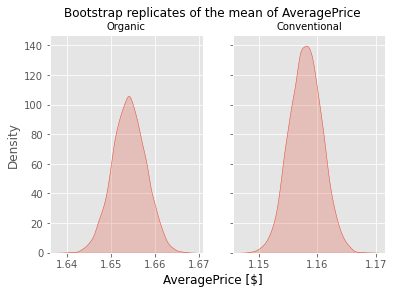

In [58]:
# Generate the bootsrap replicate means and show the distribution of these means
organic_bootstrap_means, conventional_bootstrap_means = replicate_means(organic_avgprice), replicate_means(conventional_avgprice)

fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("Bootstrap replicates of the mean of AveragePrice", fontsize=12)
fig.supxlabel("AveragePrice [$]")

ax[0].set_title("Organic", fontsize=10)
sns.kdeplot(ax=ax[0], data=organic_bootstrap_means, fill=True)

ax[1].set_title("Conventional", fontsize=10)
sns.kdeplot(ax=ax[1], data=conventional_bootstrap_means, fill=True)

plt.show()

In [47]:
# Calculate 95% confidence intervals from the distributions of the means
organic_mean_cf, conventional_mean_cf = np.percentile(organic_bootstrap_means, [2.5, 97.5]), np.percentile(conventional_bootstrap_means, [2.5, 97.5])
print(f"There is a 95% chance that the true mean AveragePrice for organic avocados lies in the interval ${organic_mean_cf[0]:.4} - ${organic_mean_cf[1]:.4}")
print(f"There is a 95% chance that the true mean AveragePrice for conventional avocados lies in the interval ${conventional_mean_cf[0]:.4} - ${conventional_mean_cf[1]:.4}")

There is a 95% chance that the true mean AveragePrice for organic avocados lies in the interval $1.647 - $1.662
There is a 95% chance that the true mean AveragePrice for conventional avocados lies in the interval $1.153 - $1.163


In [36]:
# Now calculate the same 95% confidence intervals but using the standard error of the mean
# standard error = standard deviation / sqrt(n)
organic_stderror = np.std(organic_avgprice) / np.sqrt(len(organic_avgprice))
conventional_stderror = np.std(conventional_avgprice) / np.sqrt(len(conventional_avgprice))

In [62]:
print(f"There is a 95% chance that the true mean AveragePrice for organic avocados lies in the interval ${np.mean(organic_avgprice) - organic_stderror:.4} - ${np.mean(organic_avgprice) + organic_stderror:.4}")
print(f"There is a 95% chance that the true mean AveragePrice for conventional avocados lies in the interval ${np.mean(conventional_avgprice) - conventional_stderror:.4} - ${np.mean(conventional_avgprice) + conventional_stderror:.4}")

There is a 95% chance that the true mean AveragePrice for organic avocados lies in the interval $1.65 - $1.658
There is a 95% chance that the true mean AveragePrice for conventional avocados lies in the interval $1.155 - $1.161


+ The 95% confidence intervals calculated from the standard error of the mean are consistently smaller - perhaps this indicates that a larger number of bootstrap replicates should have been used
+ We have now shown that the average price of organic and conventional avocados are almost certainly different - but we will next perform a hypothesis test anyway to demonstrate how this can be done with hacker statistics

### Is there a significant difference in average price between conventional and organic avocados?

In [ ]:
# Show the counts of each unique value in "type"
avocados["type"].value_counts()

In [ ]:
def ecdf(data):
    """Function for producing x and y data for plotting empirical cumulative distribution functions"""
    
    y = np.linspace(0, 1, len(data))
    x = np.sort(data)
    
    return x, y

In [ ]:
# Use a seed for pseudo-random generated numbers so the results can be reproduced
np.random.seed(123)

In [ ]:
# Calculate ECDFs for organic and conventional avocados
x_org, y_org = ecdf(organic_avgprice)
x_conv, y_conv = ecdf(conventional_avgprice)

# Sample from the normal distributions based on the means and standard deviations of the 
# average prices of organic and conventional avocados
normal_org = np.random.normal(np.mean(organic_avgprice), np.std(organic_avgprice), 10000)
normal_conv = np.random.normal(np.mean(conventional_avgprice), np.std(conventional_avgprice), 10000)

# Calculate ECDFs for the normal distributions
x_normal_org, y_normal_org = ecdf(normal_org)
x_normal_conv, y_normal_conv = ecdf(normal_conv)

In [ ]:
# Plot the ECDFs
fig, ax = plt.subplots()

ax.scatter(x_org, y_org, c="r", label="org", alpha=0.3, s=1)
ax.plot(x_normal_org, y_normal_org, c="k")

ax.scatter(x_conv, y_conv, c="b", label="conv", alpha=0.3, s=1)
ax.plot(x_normal_conv, y_normal_conv, c="k")

ax.set_xlabel("Price [$]")
ax.set_ylabel("Percentage of observations")
ax.set_xlim([0,3.5])
ax.set_ylim([0,1])
plt.legend()
plt.show()

+ The ECDFs for each type clearly show that the organic avocados appear to be the more expensive
+ We can also see that the average price appears to follow a normal distribution
+ We can use shuffling to test the null hypothesis that there is no difference in the mean price of organic and conventional avocados i.e. they are drawn from the same population.

In [ ]:
def shuffle_data(x, y):
    """Takes two pandas Series, joins them together and shuffles them.
    Then the shuffled data is split in two again and two pandas Series are returned.
    """
    
    joined = pd.concat([x, y])
    joined = np.array(joined)
    np.random.shuffle(joined)
    
    x = joined[:len(x)]
    y = joined[len(x):]
    
    return x, y

In [ ]:
# Calculate difference between means
actual_diff = np.mean(organic_avgprice) - np.mean(conventional_avgprice)

In [ ]:
def replicate_mean_diffs(x, y, amount=10000):
    replicates = np.zeros(amount)
    
    for i in range(amount):
        x_rep, y_rep = shuffle_data(x, y)
        diff = np.mean(x_rep) - np.mean(y_rep)
        replicates[i] = diff
        
    return replicates

In [ ]:
# Calculate array of difference between means replicates
diff_replicates = replicate_mean_diffs(organic_avgprice, conventional_avgprice)

In [ ]:
print(f"Percentage of replicates with a difference greater than \
      equal to the actual difference is {sum(diff_replicates >= actual_diff) / len(diff_replicates)}%")

+ With 10,000 reshuffles we can be sure that the difference in means is significant at the 99% confidence level
+ Can also test the null hypothesis that there is no difference in the mean price of organic and conventional avocados with a t-test

In [ ]:
from scipy.stats import ttest_ind

ttest_ind, pval = ttest_ind(organic_avgprice, conventional_avgprice)

print(f"p-value is {pval}")

if pval < 0.05:
    print(f"p-value is less than 0.05 so we can reject the null hypothesis at the 95% confidence interval")
else:
    print(f"p-value is greater than 0.05 so we cannot reject the null hypothesis at the 95% confidence interval")

### What are the cheapest and most expensive regions?

In [ ]:
# Plot "AveragePrice" of each type of avocado in each region
plt.figure(figsize=(15, 22))
sns.pointplot(data=avocados, x="AveragePrice", y="region", hue='type', join=False)
plt.show()

+ This plot shows us that the cheapest avocados are in Phoenix Tucson and the most expensive avocados are in San Francisco and Hartford Springfield

In [ ]:
# List all the unique regions 
avocados.region.unique()

+ We can see that the 'region' column includes a mix of cities, states and larger regions - we can create a new column that categorises the 'region' column into the larger regions

+ Use 9 Census Bureau-designated divisions defined here: https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

In [ ]:
from IPython.display import Image
Image("Census_Regions_and_Division_of_the_United_States.png")

In [ ]:
# Create a dictionary which groups every region into the 9 divisions
divisions = {
    "Middle Atlantic": ["Albany", "Syracuse", "BuffaloRochester",
                        "HarrisburgScranton", "NewYork", "Philadelphia",
                        "Northeast", "Pittsburgh"],
    "New England": ["Boston", "HartfordSpringfield", "Northeast",
                    "NorthernNewEngland"],
    "South Atlantic": ["Atlanta", "Tampa", "SouthCarolina",
                       "Southeast", "RaleighGreensboro", "BaltimoreWashington",
                       "Charlotte", "Jacksonville", "MiamiFtLauderdale",
                       "Orlando", "RichmondNorfolk", "Roanoke"],
    "East South Central": ["Louisville", "Midsouth", "Nashville",
                           "Southeast"],
    "East North Central": ["Chicago", "CincinnatiDayton", "Columbus",
                           "Detroit", "GrandRapids", "GreatLakes",
                           "Indianapolis"],
    "West South Central": ["DallasFtWorth", "Houston", "NewOrleansMobile",
                           "SouthCentral", "WestTexNewMexico"],
    "West North Central": ["Plains", "StLouis"],
    "Mountain": ["Boise", "Denver", "LasVegas",
                 "PhoenixTucson", "West"],
    "Pacific": ["California", "LosAngeles", "Portland",
                "Sacramento", "Seattle", "SanDiego",
                "SanFrancisco", "Spokane", "West"]
}

In [ ]:
# Create a new column that indicates which division each observation is from
def division_column(x):
    for division in divisions.items():
        if x in division[1]:
            return division[0]
        
avocados["division"] = avocados.region.apply(lambda x: division_column(x))

In [ ]:
# Create box plots of "AveragePrice", grouped by division and then further split into different types of avocado
plt.figure(figsize=(12, 12))
ax = sns.boxplot(data=avocados, x="AveragePrice", y="division", hue="type")
plt.xlabel("Average Price [$]")
plt.ylabel("Census Bureau-designated division")
plt.show()

+ The plot shows that the division with the most expensive avocados is New England, and that the division with the cheapest avocados is West South Central
+ Interestingly, in all divisions, the IQR of the average price of organic avocados is larger than that of conventional avocados
+ There are many outliers in each division, with some organic avocados being cheaper than the mean conventional avocado price and vice versa

### How does the price vary with time?

+ We know that there is little correlation between price and year, but how does the price vary within each year?

In [ ]:
# Create month column
avocados["month"] = avocados["Date"].dt.month

In [ ]:
# Plot the mean avocado price for each division, grouped by month
from calendar import month_name

fig, ax = plt.subplots()
ax.set_prop_cycle(color=sns.color_palette("bright", 9))
fig.set_size_inches(18.5, 10.5)
months = range(1, 13)

for division in avocados.division.unique():
    # Some observations have a 'division' value of None
    if division != None:
        average_monthly_prices = avocados[avocados["division"] == division].groupby("month")["AveragePrice"].mean()
        ax.plot(months, average_monthly_prices, label=division)

ax.set_xlabel("Month")
ax.set_xticks(months)
ax.set_xticklabels(month_name[1:])  # Use month names as x tick labels
ax.set_ylabel("Average Price [$]")
ax.set_xlim([1, 12])
plt.legend(loc="upper left")
plt.show()

+ In all divisions, except New England and Middle Atlantic, the price of avocados rises steadily from May and peaks in September - October before falling rapidly again
+ Assuming that the demand for avocados does not change much, this plot suggests that (for most divisions) the supply of avocados falls from May to September-October - perhaps more avocados have to be imported during this period
+ The plot also suggests that for some reason the supply of avocados does not vary much all year round in New England and Middle Atlantic

### Chi-square test to see if the ratio of conventional to organic avocados bought varies between divisions